#  Investigating Fandango Movie Ratings

---

## Content
> ### 1. Introduction
> ### 2. Understanding the Data
> ### 3. Isolating the Samples We Need
> ### 4. Comparing Distribution Shapes for 2015 and 2016
> ### 5. Comparing Relative Frequencies
> ### 6. Determining the Direction of the Change
> ### 7.  Conclusion

---

## Introduction

`Fandango` is an online movie ratings aggregator. [Fandango](https://www.fandango.com/) displays a 5-star rating system on their website, where the minimum rating is 0 stars and the maximum is 5 stars.

In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest 

In this project, we will analyze more recent movie ratings data to `determine` whether there has been any change in Fandango's rating system after Hickey's analysis.

-----

## Understanding the Data

Walt Hickey made the data he analyzed publicly available [on GitHub](https://github.com/fivethirtyeight/data/tree/master/fandango). We'll use the data he collected to analyze the characteristics of Fandango's rating system previous to his analysis.

One of Dataquest's team members collected movie ratings data for movies released in 2016 and 2017. The data is publicly available [on GitHub](https://github.com/mircealex/Movie_ratings_2016_17) and we'll use it to analyze the rating system's characteristics after Hickey's analysis.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# read data sets
fandango_score_comparison = pd.read_csv("fandango_score_comparison.csv")
movie_ratings_16_17 = pd.read_csv("movie_ratings_16_17.csv")

In [17]:
fandango_score_comparison.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [18]:
movie_ratings_16_17.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [19]:
# Isolate columns that offer information we are interested in.
fandango_score_comparison = fandango_score_comparison[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
movie_ratings = movie_ratings_16_17[['movie', 'year', 'fandango']]

In [20]:
fandango_score_comparison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 5 columns):
FILM                    146 non-null object
Fandango_Stars          146 non-null float64
Fandango_Ratingvalue    146 non-null float64
Fandango_votes          146 non-null int64
Fandango_Difference     146 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 5.8+ KB


In [21]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 3 columns):
movie       214 non-null object
year        214 non-null int64
fandango    214 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.1+ KB


----

**Define the population of interest for our goal**

Our goal is to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

* However, the sampling processes from Hickey were not random and therefore, all the movies did not have an equal chance to be included in the two samples.

At this point, we have two alternatives: either we collect new data, either we change the goal of our analysis by placing some limitations on it.

Tweaking our goal seems a much faster choice compared to collecting new data. Tweaking our goal to **finding out whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016** is a better option

We now have two populations that we want to describe and compare with each other:

> * All Fandango's ratings for popular movies released in 2015.
> * All Fandango's ratings for popular movies released in 2016.

For this exercise, we will use Hickey's benchmark of **30** fan ratings and consider a movie as **"popular"** only if it has 30 fan ratings or more on Fandango's website.

-----

## Isolating the Samples We Need

In this section, we will:

Isolate the movies released in 2015 in a separate data set.
Isolate the movies released in 2016 in another separate data set.
These are the data sets we'll use next to perform our analysis.


In [13]:
# Check if all sample points are movies with 30+ fan ratings on Fandango

fandango_score_comparison['Fandango_votes'].describe()

count      146.000000
mean      3848.787671
std       6357.778617
min         35.000000
25%        222.250000
50%       1446.000000
75%       4439.500000
max      34846.000000
Name: Fandango_votes, dtype: float64

Our result showss that the entire list is considered "popular" since the **minimum value is 35 votes.**

One of the data sets doesn't provide information about the number of fan ratings, and this raises representativity issues once again.
we find a quick way to check whether this sample contains enough popular movies as to be representative. To do this, we add back the "audience" column to filter 'popular' movies

In [22]:
# Add back the "audience" column to filter 'popular' movies
movie_ratings_rev = movie_ratings_16_17[['movie', 'year', 'fandango', 'audience']]

# Filter for popular movies
movie_ratings_pop = movie_ratings_rev[movie_ratings_rev.audience >= 30]
movie_ratings_pop['audience'].describe()

count    191.000000
mean      63.125654
std       17.529371
min       30.000000
25%       49.000000
50%       64.000000
75%       79.000000
max       93.000000
Name: audience, dtype: float64

Looking t the **"FILM"** column in the fandango_score_comparison data set, we see the year the movies was released.
> * We strip the year and add it as a new column.
> * Isolate the movies released in 2015 in a separate data set.
> * Isolate the movies released in 2016 in separate data set.

In [25]:
# Strip the year from the Film column and add as new column called "Year"
fandango_score_comparison['Year'] = fandango_score_comparison['FILM'].str[-5:-1].astype(int)
fandango_score_comparison.sample(5)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
91,Paddington (2015),4.5,4.3,4045,0.2,2015
38,Saint Laurent (2015),3.5,3.1,43,0.4,2015
21,Insidious: Chapter 3 (2015),4.5,4.1,3276,0.4,2015
15,Taken 3 (2015),4.5,4.1,6757,0.4,2015
74,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,0.2,2014


In [ ]:
# Isolate the movies released in 2015

popular_movies_2015 = fandango_score_comparison[fandango_score_comparison['Year'] == 2015]

# Isolate the movies released in 2016

popular_movies_2016 = movie_ratings_pop[movie_ratings_pop.year == 2016]

In [33]:
print("popular_movies_2015", popular_movies_2015.shape)
print("popular_movies_2016", popular_movies_2016.shape)

popular_movies_2015 (129, 6)
popular_movies_2016 (172, 4)


In [29]:
popular_movies_2015.sample(5)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
125,The Wedding Ringer (2015),4.5,4.4,6506,0.1,2015
61,American Ultra (2015),4.0,3.7,638,0.3,2015
21,Insidious: Chapter 3 (2015),4.5,4.1,3276,0.4,2015
141,Mr. Holmes (2015),4.0,4.0,1348,0.0,2015
56,Project Almanac (2015),4.0,3.7,1834,0.3,2015


In [30]:
popular_movies_2016.sample(5)

,movie,year,fandango,audience
161,The Autopsy of Jane Doe,2016,4.5,71
152,Sully,2016,4.5,85
208,Why Him?,2016,4.0,57
202,Under the Shadow,2016,4.0,76
147,Snowden,2016,4.0,72


## Comparing Distribution Shapes for 2015 and 2016

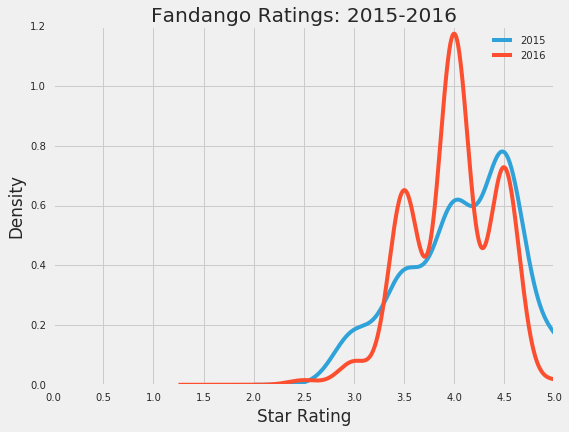

In [31]:
# Generate kernel density plots

%matplotlib inline
plt.style.use('fivethirtyeight')

popular_movies_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (8,6))
popular_movies_2016['fandango'].plot.kde(label = '2016', legend = True)
plt.title('Fandango Ratings: 2015-2016')
plt.xlabel('Star Rating')
plt.xlim(0,5)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.show()

From the above distribution we can tells the following:

* The shape of the 2015 distribution is left skewed
* The shape of the 2016 distribution is left skewed too, however it has slightly lower ratings
This tells us that there has been a change in Fandango's ranking system of popular movies after Hickey's analysis. Movies in 2016 are rated lower compared to 2015.

----

## Comparing Relative Frequencies

Since the two samples has different numbers of popular movies (**129 movies in 2015 and 172 movies 2016**), it makes more sense to use relative frequencies of the two data sets instead.

In [35]:
 # 2015 Frequency distribution
popular_movies_2015['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [36]:
popular_movies_2016['fandango'].value_counts(normalize = True).sort_index() * 100

2.5     0.581395
3.0     2.906977
3.5    24.418605
4.0    44.186047
4.5    27.325581
5.0     0.581395
Name: fandango, dtype: float64

We can now see clearer view as in 2016, there were 10% less 4.5 star reviews and 6.4% less 5 star reviews than in 2015.

Determining the Direction of Change
We'll take a couple of summary statistics to get a more precise picture about the direction of the difference.

---

## Determining the Direction of the Change

In this section, we will take a couple of summary statistics for both data set samples to get a more precise picture about the direction of the difference.

We will take each distribution of movie ratings and compute its mean, median, and mode, and then compare these statistics to determine what they tell about the direction of the difference.

In [38]:
# Calculate mean, median, and mode for 2015 and 2016

mean_2015 = popular_movies_2015['Fandango_Stars'].mean()
mean_2016 = popular_movies_2016['fandango'].mean()
mode_2015 = popular_movies_2015['Fandango_Stars'].mode()[0]
mode_2016 = popular_movies_2016['fandango'].mode()[0]
median_2015 = popular_movies_2015['Fandango_Stars'].median()
median_2016 = popular_movies_2016['fandango'].median()

In [39]:
# Create a dataframe

summary_stat = pd.DataFrame()
summary_stat['2015'] = [mean_2015, median_2015, mode_2015]
summary_stat['2016'] = [mean_2016, median_2016, mode_2016]
summary_stat.index = ['mean', 'median', 'mode']
summary_stat

,2015,2016
mean,4.085271,3.982558
median,4.000000,4.000000
mode,4.500000,4.000000


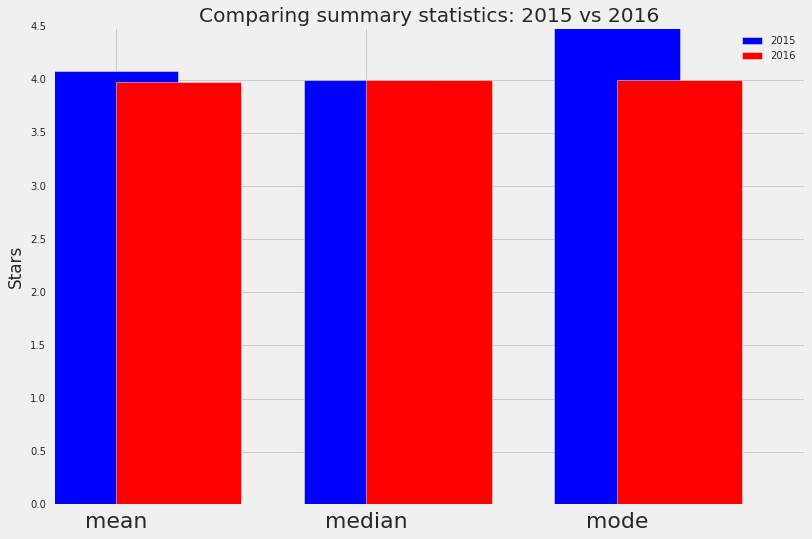

In [42]:
# Generate a grouped bar plot to show the comparison

summary_stat['2015'].plot.bar(color='blue', align='center', label = '2015', figsize=(12, 8), rot='90')
summary_stat['2016'].plot.bar(color='red', align='edge', label = '2016')
plt.ylabel('Stars')
plt.xticks(rotation=0, fontsize=22)
plt.title('Comparing summary statistics: 2015 vs 2016')
plt.legend()
plt.show()


## Conclusion

From our analysis, we saw that there's a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We can say this changes were made due the Fandango's response to Hickey's analysis. On average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.